<html>
    <body>
        <h1 style="background-color:powderblue;">L’interpolation polynômiale</h1>
    </body>
 </html>   

## En analyse numérique, l’interpolation polynômiale est une
## technique d’interpolation d’une fonction par un polynôme.
## Etant donnés une fonction f : [a, b] → R et N > 1 un entier
## naturel. Soint x0, x1, · · · , xN (N + 1) points (appelés aussi des
## noeuds) deux à deux distincts dans [a, b]. Le but est de
## chercher à trouver un polynôme p (à coefficients réels) vérifiant
## le système suivant :
## (
## f (xi) = p(xi), pour tout i = 0, 1, · · · , N
## deg(p) 6 N.
## Théorème : Il existe un unique polynôme p vérifiant le système
## précedent.
## La preuve se base sur le déterminant de Van der Monde.

In [1]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import math


In [2]:
def SIMUL(N,a,b,f):
    N = int(int_slider.value)
    a = float(text_a.value)
    b = float(text_b.value)

    f=lambda x:eval(text_func.value)

    X=np.linspace(a,b,N)
    Y=f(X)
    p=np.polyfit(X,Y,N-1)
    t=np.linspace(a,b,1000)
    fig = plt.figure(figsize=(12, 10))
    plt.subplot(211)
    plt.grid(True)
    plt.plot(t, f(t), 'r', label='f(x)')
    plt.plot( X,Y, '.b')
    plt.plot(t, np.polyval(p, t),'g', label='interpolation polynômiale de f(x)')
    plt.plot(t, f(t) - np.polyval(p, t), 'b', label='Erreur d interpolation')
    plt.title('Interpolation Equidistante', color="#5F4C0B")
    plt.xlabel('x')
    plt.legend()
    xi = [None] * N
    yi = [None] * N
    for k in range(0,N):
        xi[k] = (a + b) / 2 + (a - b) / 2 * math.cos((k) / (N-1) * math.pi)
        yi[k] = f(xi[k])

    pt=np.polyfit(xi,yi,N)
    plt.subplot(212)
    plt.grid(True)
    plt.plot(t, f(t), 'r', label='f(x)')
    plt.plot(xi, yi, '.b')
    plt.plot(t, np.polyval(pt, t),'g',label='interpolation polynômiale de f(x)')
    plt.plot(t, f(t) - np.polyval(pt, t), 'b',label='Erreur d interpolation')
    plt.title('Interpolation Tchebychev', color="#5F4C0B")
    plt.xlabel('x')
    plt.legend()
    
    
    

In [3]:
output = widgets.Output()
with output:
    fig= plt.figure(figsize=(12,10))
fig.canvas.toolbar_position = 'bottom'

<Figure size 864x720 with 0 Axes>

In [4]:
int_slider = widgets.IntSlider(value=2, min=1, max=50, step=1, description='Choisir N')
text_func=widgets.Text(value='1/(1+x**2)', description='Fonction', continuous_update=False)     
text_a = widgets.IntText(value=-5,description='Valeur de a', continuous_update=False)
text_b = widgets.IntText(value=5,description='Valeur de b', continuous_update=False)
button = widgets.Button(description="plot")

In [5]:
def on_button_clicked(b):
     with output:
        fig.clear()
        SIMUL(int_slider.value,text_func.value,text_a.value,text_b.value)

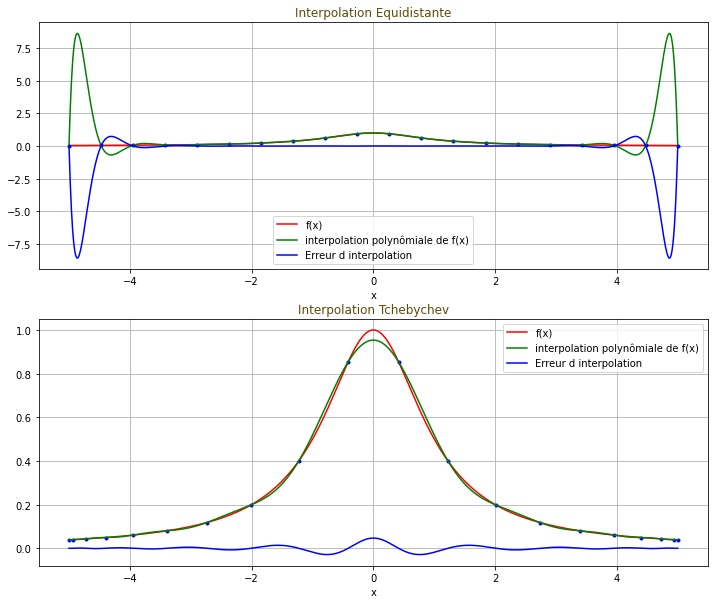

In [6]:
vbox1 = widgets.VBox([int_slider,text_func,text_a,text_b,button])
vbox2 = widgets.VBox([ output])

box_layout = widgets.Layout(
        border='solid 4px pink',
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px')

vbox1.layout = box_layout
vbox2.layout = box_layout
button.on_click(on_button_clicked)
widgets.HBox([vbox1, vbox2])